In [155]:
import os
if "ACCEPT_TC" not in os.environ:
    os.environ["ACCEPT_TC"] = "tôi đồng ý"

from vnstock3 import Vnstock
from datetime import datetime
import matplotlib.pyplot as plt 

In [41]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [16]:
stock = Vnstock().stock(symbol="FRT", source="VCI")

2024-06-02 04:22:41,054 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [139]:
configs = {
    "NGAN_HANG": ["VNINDEX", "VCB", "BID", "CTG", "TCB", "VPB", "MBB", "ACB", "HDB", "VIB", "LPB", "STB"],
    "BAN_LE": ["VNINDEX", "MWG", "FRT", "DGW", "PET", "AST", "DHT"],
    "BAT_DONG_SAN": [
        "VHM",
        "VIC",
        "BCM",
        "VRE",
        "NVL",
        "KDH",
        "SSH",
        "KBC",
        "NLG",
        "TCH",
        "NTL",
    ],
    "TAI_CHINH": [
        "SSI",
        "VND",
        "VCI",
        "HCM",
        "SHS",
        "MBS",
        "VIX",
        "FTS",
        "BSI",
        "EVF",
        "CTS",
        "DSC",
        "BVS",
    ],
    "HANG_CA_NHAN": [
        "PNJ",
        "VGT",
        "TCM",
        "TLG",
        "MSH",
        "RAL",
    ],
    "THUC_PHAM": [
        "VNM",
        "MCH",
        "MSN",
        "SAB",
        "VSF",
        "KDC",
        "QNS",
        "VHC",
        "HAG",
        "BHN",
        "HNG",
        "ANV",
    ],
    "TAI_NGUYEN": [
        "HPG",
        "MSR",
        "HSG",
        "ACG",
        "NKG",
        "KSV",
        "VIF",
        "PTB",
        "TVN",
        "PRT",
    ],
    "XAY_DUNG": [
        "VGC",
        "HUT",
        "CTR",
        "VCG",
        "VCS",
        "BMP",
        "PC1",
        "CTD",
        "SCG",
        "HHV",
        "CII",
    ],
    "DIEN_NUOC_XANG": [
        "GAS",
        "PGV",
        "VSH",
        "POW",
        "BWE",
        "HND",
        "QTP",
        "NT2",
    ],
    "DAU_KHI": [
        "BSR",
        "PLX",
        "PVS",
        "PVD",
        "OIL",
    ],
    "DICH_VU_CONG_NGHIEP": [
        "ACV",
        "VEA",
        "GMD",
        "REE",
        "MVN",
        "GEX",
        "GEE",
        "PVT",
        "VTP",
    ],
    "CONG_NGHE": [
        "FPT",
        "CMG",
        "SAM",
    ],
    "BAO_HIEM": [
        "BVH",
        "PVI",
        "VNR",
        "BIC",
        "MIG",
        "BMI",
        "ABI",
    ],
    "HOA_CHAT": [
        "GVR",
        "DGC",
        "DCM",
        "DPM",
        "PHR",
        "AAA",
    ],
    "OTO_PHU_TUNG":[
        "DRC",
        "HHS",
        "CTF",
        "SVC",
        "CSM",
        "HAX",
    ],
    "DU_LICH": [
        "VJC",
        "SCS",
        "TSJ",
    ],
    "VIEN_THONG": [
        "VGI",
        "FOX",
        "VEF",
        "VNZ"
    ],
    "Y_TE":[
        "DHG",
    "IMP",
    "DVN",
    "DBD",
    ]
}

In [146]:
def get_data(symbol, origin_date, end_date):
    try:
        df = stock.quote.history(symbol=symbol, start="2023-01-01", end=end_date)
        origin_close = float(df[df["time"] == origin_date]["close"].iloc[0])
        scale = origin_close / 100
        
        data = df[["time", "close"]]
        data["close"] = data["close"].div(scale)
        return data[data["time"] >= origin_date]
    except:
        print("Error: {} {} {}".format(symbol, origin_date, end_date))
        return None

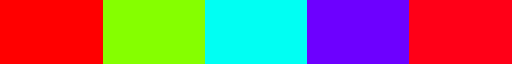

In [161]:
plt.get_cmap('hsv', 5)

In [162]:
colors[0:4]

['#e2d454', '#26c6da', '#fbc02d', '#673ab7']

In [166]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [175]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.get_cmap(name, n)

def get_colors(n):
    colors = ["#e2d454", "#26c6da", "#fbc02d", "#673ab7", "#4caf50", "#00bfa5", "#ff5252", "#f48fb1", "#82b1ff", "#00e5ff", "#0048ff", "#1eff00", "#ff6600", "#3a6630", "#305666"]
    if n <= len(colors):
        return colors[0:n]
    
    outputs = list(colors)
    m = n - len(outputs)
    cmap = get_cmap(m)
    for i in range(m):
        outputs.append(cmap(i))
    return outputs

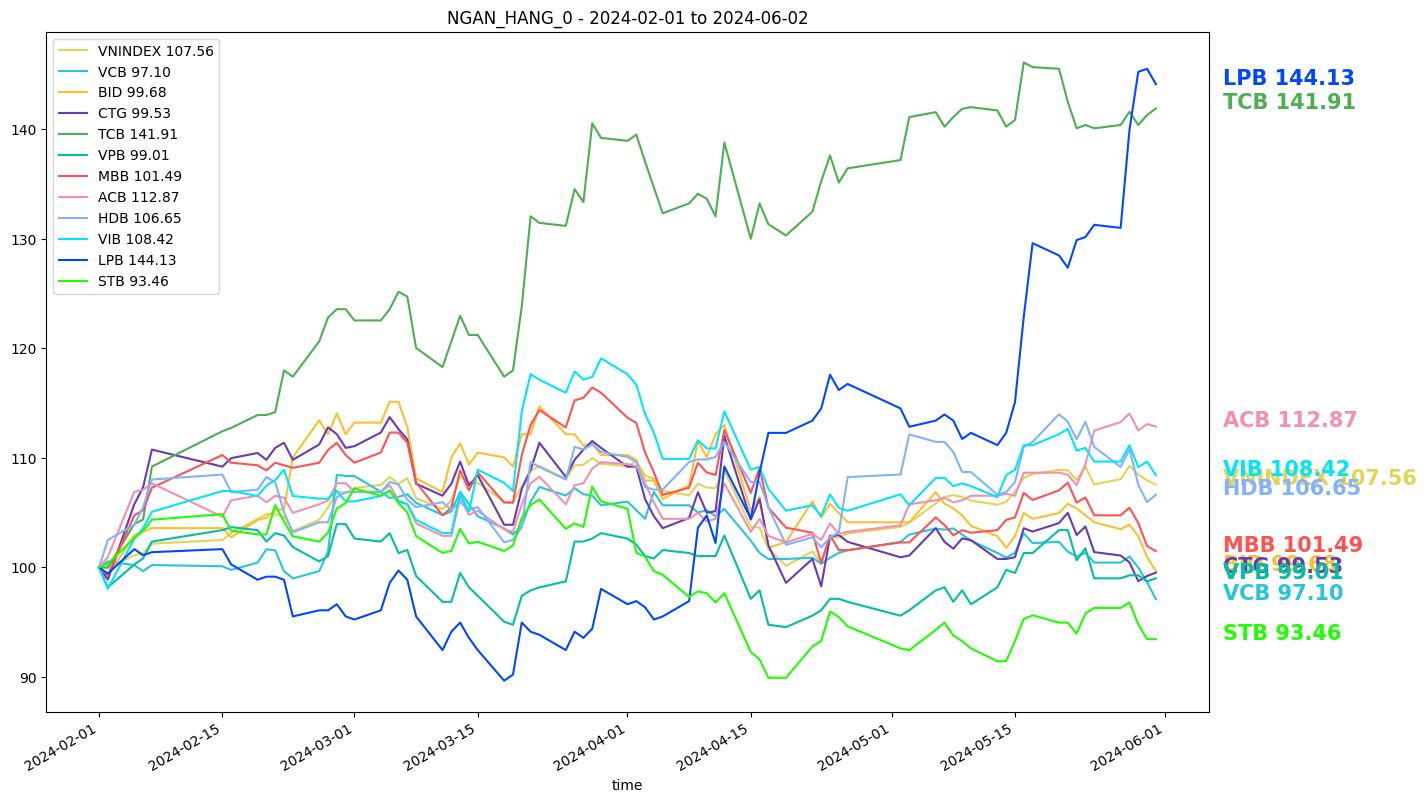

In [188]:
list_origin_dates = ["2024-02-01", "2024-03-01", "2024-04-01", "2024-05-02"]
end_date = datetime.now().strftime("%Y-%m-%d")
for (group, tickers) in configs.items():
    ticker_colors = get_colors(len(tickers))
    for idx, origin_date in enumerate(list_origin_dates):
        # file_name = "images/{}_{}.jpg".format(group, idx)
        # if os.path.exists(file_name):
        #     print("Skip {}".format(file_name))
        #     continue
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title("{}_{} - {} to {}".format(group, idx, origin_date, end_date))
        for ticker_idx, ticker in enumerate(tickers):
            data_ticker = get_data(ticker, origin_date, end_date)
            color = ticker_colors[ticker_idx]
            if data_ticker is None:
                continue
            last_value = data_ticker["close"].iloc[-1]
            label = '{} {:.2f}'.format(ticker, last_value)
            
            data_ticker.plot(ax=ax, x='time', y='close', label=label, color=color)
            ax.annotate(label, xy=(1, last_value), xytext=(10, 0), 
                     xycoords=('axes fraction', 'data'), textcoords='offset points', 
                    color=color, fontsize=15, weight='bold')
        
        # plt.savefig(file_name)
        # print("Saved {}".format(file_name))
        plt.show()
        # plt.close()
        break
    break
        

In [154]:
for k in configs.keys():
    print("# {}".format(k))
    for i in range(4):
        n = "{}_{}".format(k, i)
        print("![\"{}\"]({}.jpg)".format(n, n))

# NGAN_HANG
!["NGAN_HANG_0"](NGAN_HANG_0.jpg)
!["NGAN_HANG_1"](NGAN_HANG_1.jpg)
!["NGAN_HANG_2"](NGAN_HANG_2.jpg)
!["NGAN_HANG_3"](NGAN_HANG_3.jpg)
# BAN_LE
!["BAN_LE_0"](BAN_LE_0.jpg)
!["BAN_LE_1"](BAN_LE_1.jpg)
!["BAN_LE_2"](BAN_LE_2.jpg)
!["BAN_LE_3"](BAN_LE_3.jpg)
# BAT_DONG_SAN
!["BAT_DONG_SAN_0"](BAT_DONG_SAN_0.jpg)
!["BAT_DONG_SAN_1"](BAT_DONG_SAN_1.jpg)
!["BAT_DONG_SAN_2"](BAT_DONG_SAN_2.jpg)
!["BAT_DONG_SAN_3"](BAT_DONG_SAN_3.jpg)
# TAI_CHINH
!["TAI_CHINH_0"](TAI_CHINH_0.jpg)
!["TAI_CHINH_1"](TAI_CHINH_1.jpg)
!["TAI_CHINH_2"](TAI_CHINH_2.jpg)
!["TAI_CHINH_3"](TAI_CHINH_3.jpg)
# HANG_CA_NHAN
!["HANG_CA_NHAN_0"](HANG_CA_NHAN_0.jpg)
!["HANG_CA_NHAN_1"](HANG_CA_NHAN_1.jpg)
!["HANG_CA_NHAN_2"](HANG_CA_NHAN_2.jpg)
!["HANG_CA_NHAN_3"](HANG_CA_NHAN_3.jpg)
# THUC_PHAM
!["THUC_PHAM_0"](THUC_PHAM_0.jpg)
!["THUC_PHAM_1"](THUC_PHAM_1.jpg)
!["THUC_PHAM_2"](THUC_PHAM_2.jpg)
!["THUC_PHAM_3"](THUC_PHAM_3.jpg)
# TAI_NGUYEN
!["TAI_NGUYEN_0"](TAI_NGUYEN_0.jpg)
!["TAI_NGUYEN_1"](TAI_NGUYEN_1.jpg)
